In [1]:
#!pip install scikit-learn
#!pip install pytesseract
#!pip install tesseract
#!pip install tesseract-ocr this command deosnt weork

#So install tesseract-ocr using apt install

In [1]:
# remove warning message
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from local_utils import detect_lp
from os.path import splitext,basename
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob

import math

import pytesseract
tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"


In [2]:
def get_image_formats(img):

    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(img, alpha=(255.0))

    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)

    # Applied inversed thresh_binary 
    binary = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilate = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    
    return plate_image, gray, blur, binary, dilate

In [3]:
def plot_allimages(allimage_types, allimage_titles, string_flag = True):
    
    
    for img_cnt, img in enumerate(allimage_types):
        plt.subplot(2,3,img_cnt+1)
        plt.imshow(img, cmap="gray")
        
        if (string_flag ==True):
            out = pytesseract.image_to_string(img, config=tess_config, lang="eng")
        else:
            out =''
            
        plt.title(allimage_titles[img_cnt] + ' : ' + out, fontsize = 20)
            

    plt.show()
        #print(f'Image: {out}')   

In [4]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
def enhance(input_img):
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(input_img)
    #plt.imshow('l_channel', l)
    #cv2.imshow('a_channel', a)
    #cv2.imshow('b_channel', b)

    #-----Applying CLAHE to L-channel-------------------------------------------
    
    cl = clahe.apply(l)
    #cv2.imshow('CLAHE output', cl)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    #cv2.imshow('limg', limg)

    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    #cv2.imshow('final', final)
    
    return final

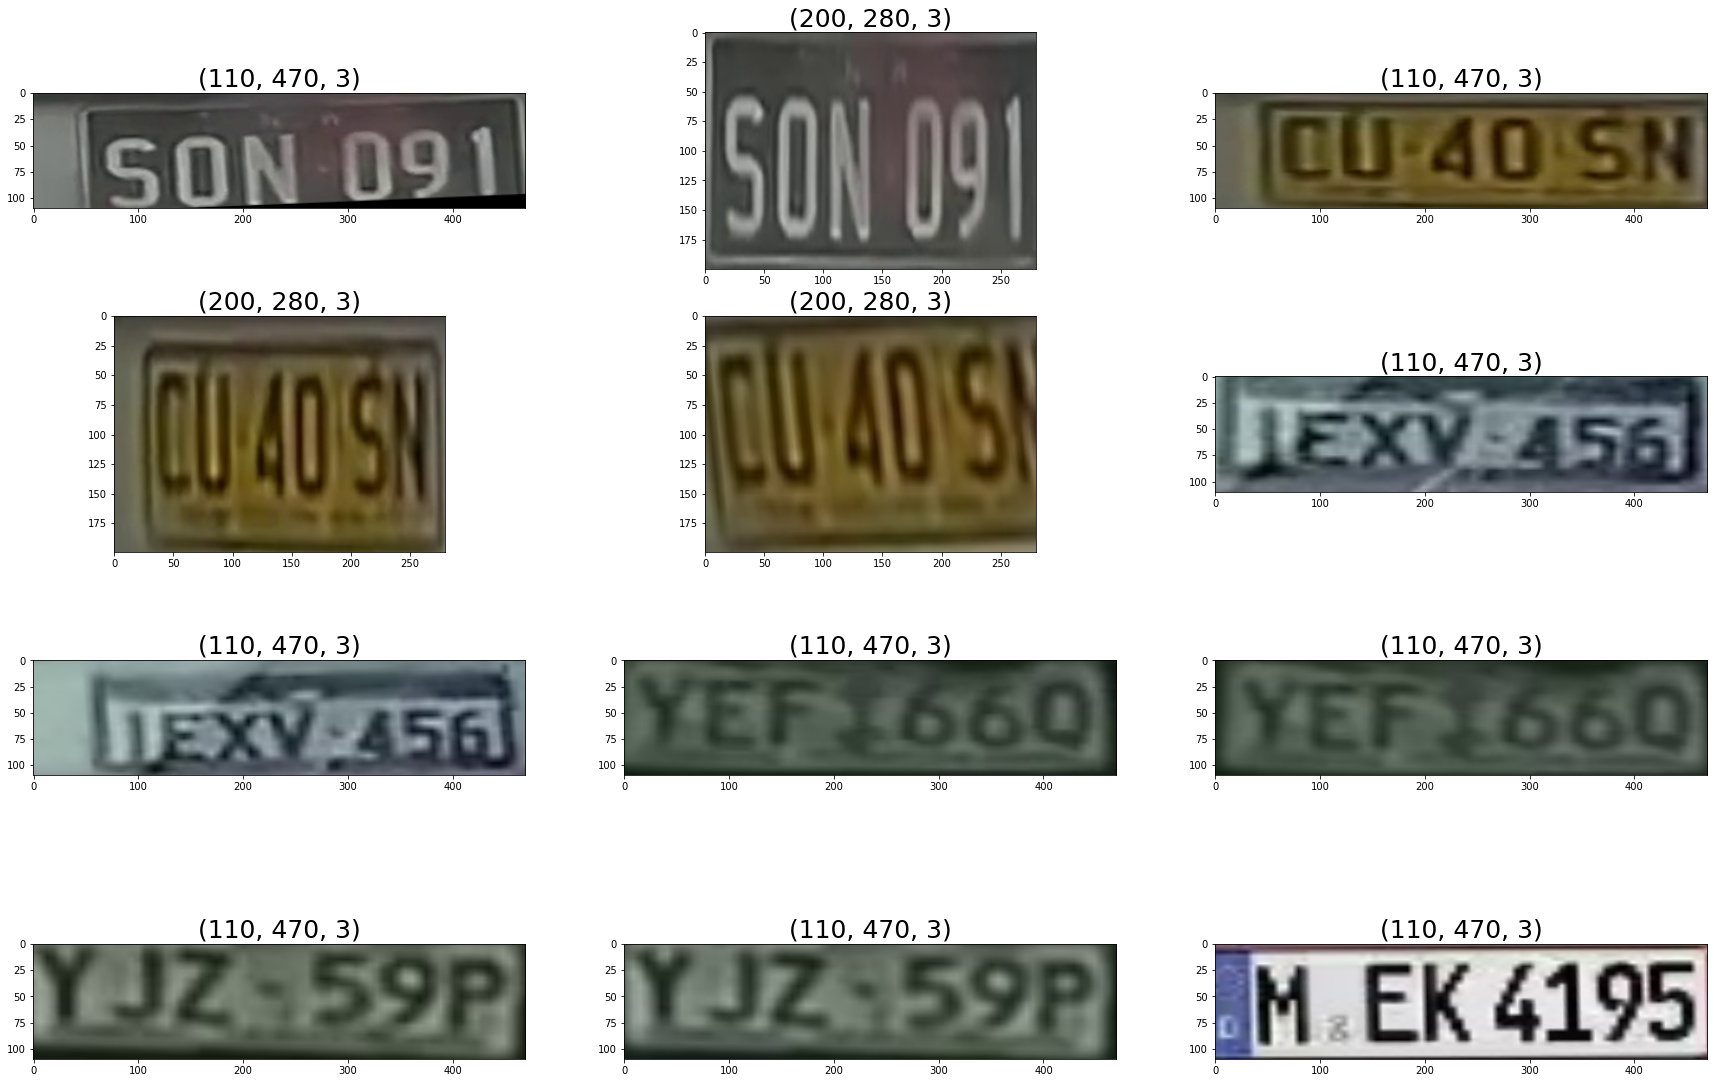

In [5]:
fnames = glob.glob('plate_samples/*.jpg')
fnames.sort()
#print(fnames)

cols = 3
rows = math.ceil(len(fnames)/cols)

plt.figure(figsize=(30,rows*5))
for fcnt, f in enumerate(fnames):
    img = plt.imread(f)
    plt.subplot(rows,cols,fcnt+1)    
    plt.imshow(img)
    title = str(img.shape)
    plt.title(title, fontsize=25 )

In [6]:
#LpImg_paths = ['../../TSK_00_MSC/wt2-body-tracker/output/BMW/BMW_red_front_short/det_LpImg_crops/0_0_1_0_N.jpg']
#LpImg_paths = ['../../TSK_00_MSC/wt2-body-tracker/output/BMW_red_front_short/det_LpImg_crops/highres_plate_1_0_0_NAMEK4195.jpg']
#LpImg_paths = ['../../TSK_00_MSC/wt2-body-tracker/output/Dash_cam_4/det_LpImg_crops/highres_plate_0_0_0_NSON091.jpg']
#LpImg_paths = ['../../TSK_00_MSC/wt2-body-tracker/output/Dash_cam_4/det_LpImg_crops/highres_plate_7_1_0_NCUADSt.jpg']
#LpImg_paths=['../../TSK_00_MSC/wt2-body-tracker/output/Dash_cam_1/det_LpImg_crops/highres_plate_25_0_0_NaeratuWetheee.jpg']


img_list = []
enhanced_img_list =[]
for Img in  fnames:
    img = cv2.imread(Img)
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    enhanced_img = enhance(lab)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    img_list.append(img)
    enhanced_img_list.append(enhanced_img/255)
    
    #plt.figure()
    #plt.imshow(img)
    #plt.figure()
    #plt.imshow(enhanced_img)

LpImg = img_list

# Original Images

In [7]:
def plot_orig_binary_inverted(orig, binary, inverted):
    
    plt.subplot(131)
    plt.imshow(orig)
    out = pytesseract.image_to_string(orig.astype(np.uint8), config=tess_config, lang="eng")
    plt.title(f'Original : {out}')
    
    plt.subplot(132)
    plt.imshow(binary, cmap = "gray")
    out = pytesseract.image_to_string(binary.astype(np.uint8), config=tess_config, lang="eng")
    plt.title(f'Binary : {out}')
    
    plt.subplot(133)
    plt.imshow(inverted, cmap = "gray")
    out = pytesseract.image_to_string(inverted.astype(np.uint8), config=tess_config, lang="eng")
    plt.title(f'Inverted : {out}')
    
    plt.show()
    

# SWAPPING BINARIES

Original images : (110, 470, 3)


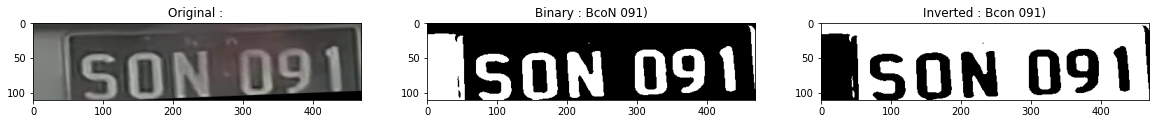

********************************
Enhanced images : (110, 470, 3)


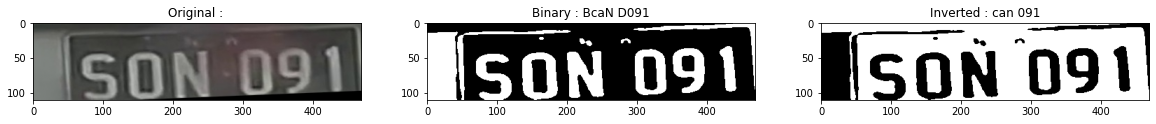

*************************************************************************
Original images : (200, 280, 3)


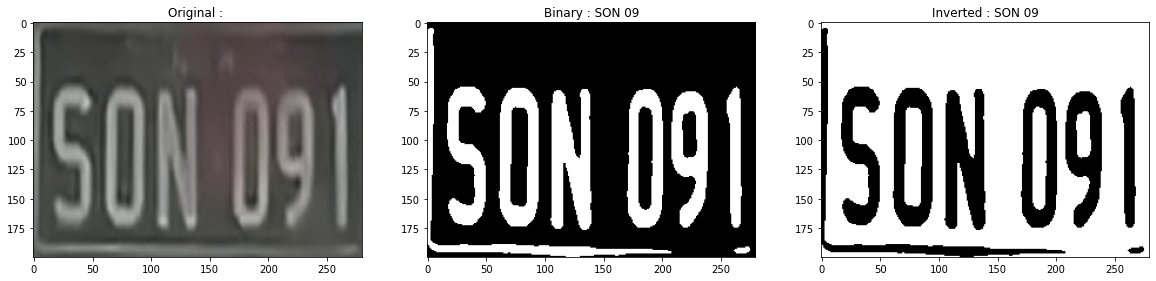

********************************
Enhanced images : (200, 280, 3)


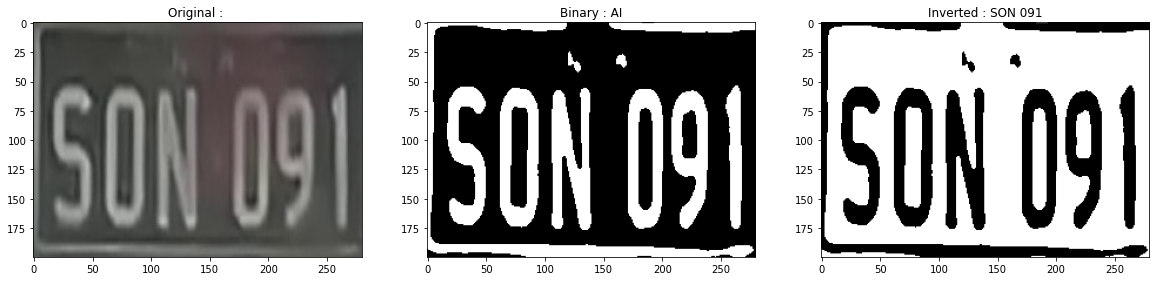

*************************************************************************
Original images : (110, 470, 3)


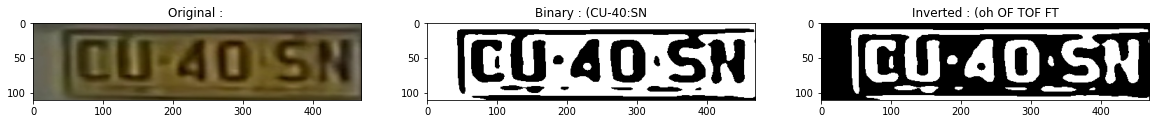

********************************
Enhanced images : (110, 470, 3)


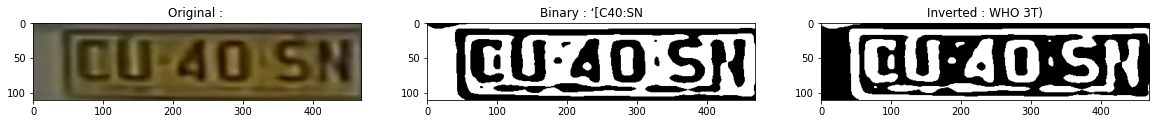

*************************************************************************
Original images : (200, 280, 3)


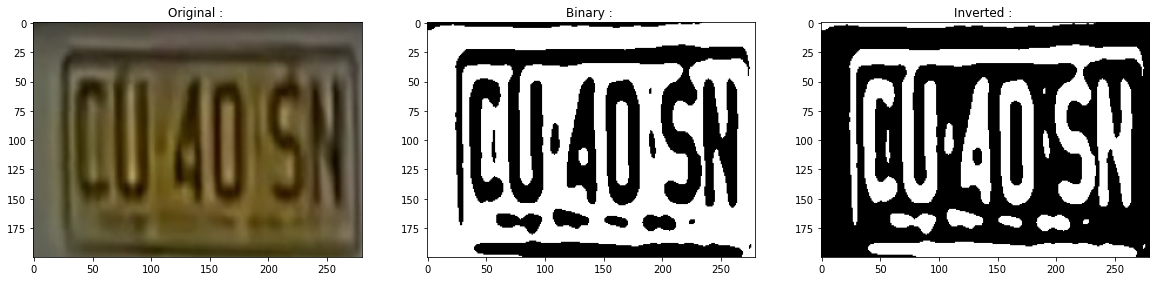

********************************
Enhanced images : (200, 280, 3)


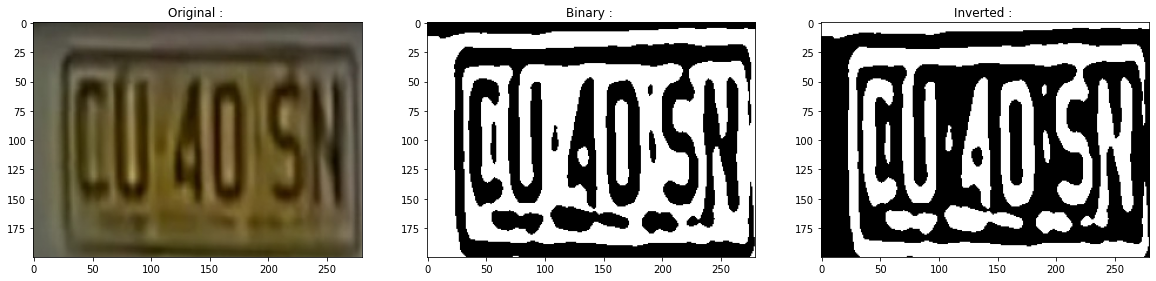

*************************************************************************
Original images : (200, 280, 3)


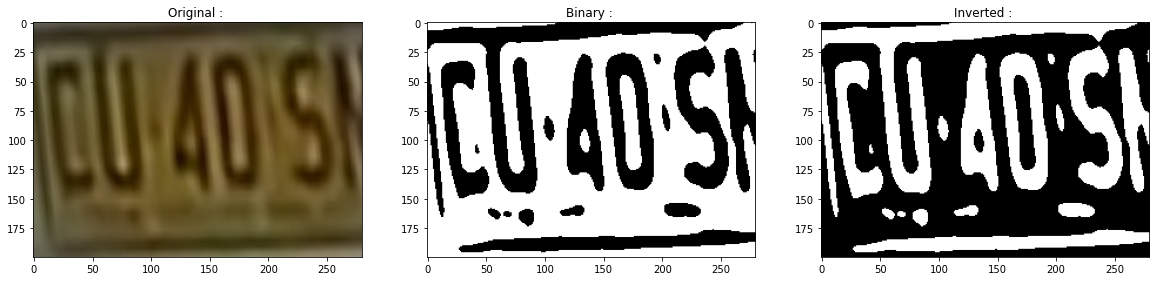

********************************
Enhanced images : (200, 280, 3)


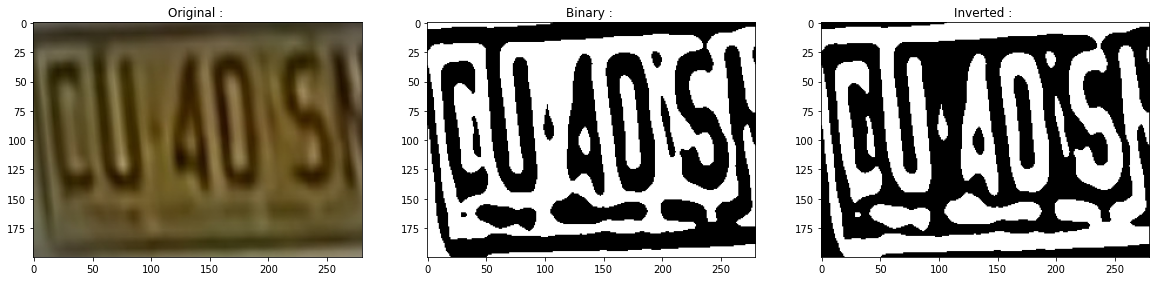

*************************************************************************
Original images : (110, 470, 3)


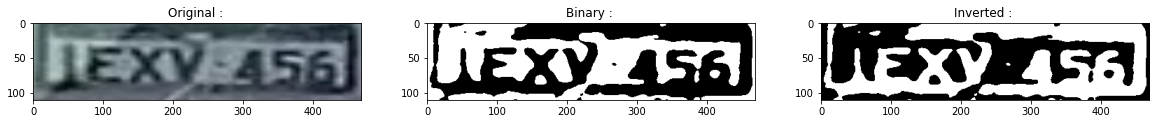

********************************
Enhanced images : (110, 470, 3)


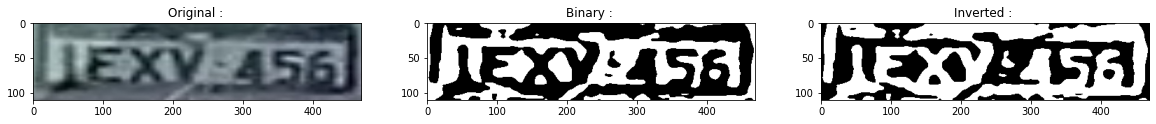

*************************************************************************
Original images : (110, 470, 3)


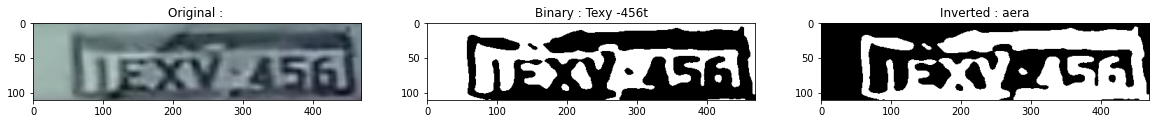

********************************
Enhanced images : (110, 470, 3)


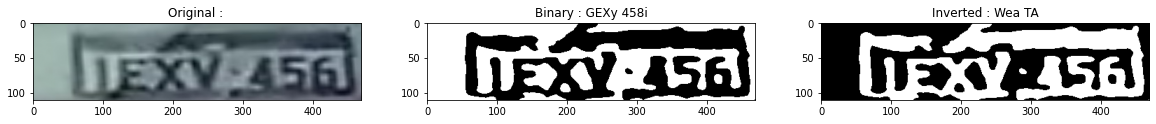

*************************************************************************
Original images : (110, 470, 3)


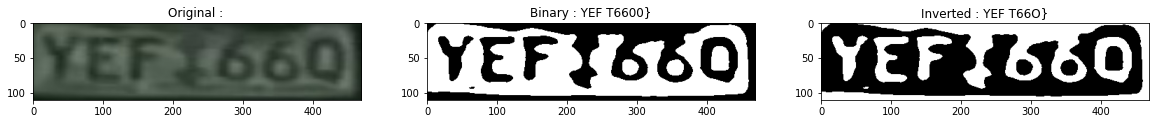

********************************
Enhanced images : (110, 470, 3)


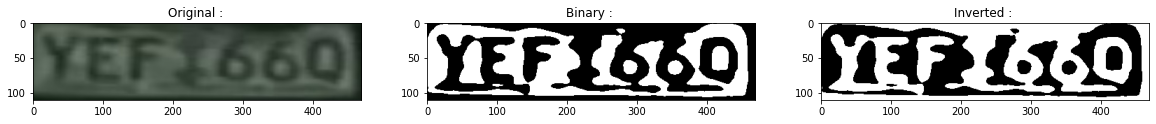

*************************************************************************
Original images : (110, 470, 3)


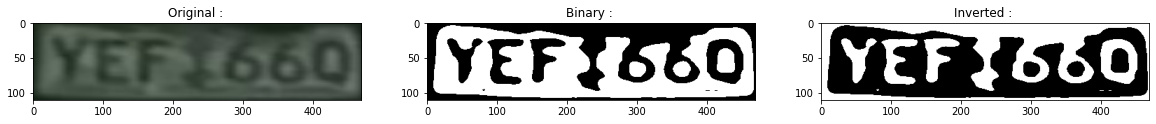

********************************
Enhanced images : (110, 470, 3)


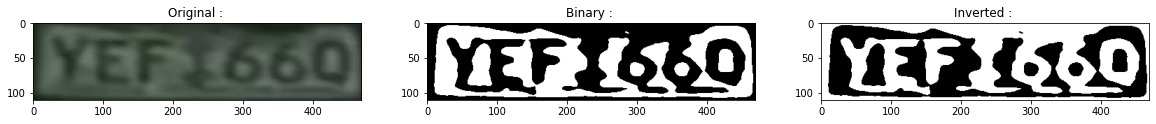

*************************************************************************
Original images : (110, 470, 3)


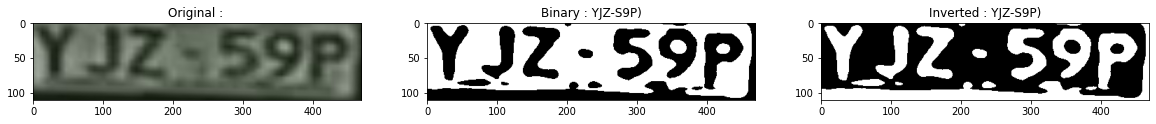

********************************
Enhanced images : (110, 470, 3)


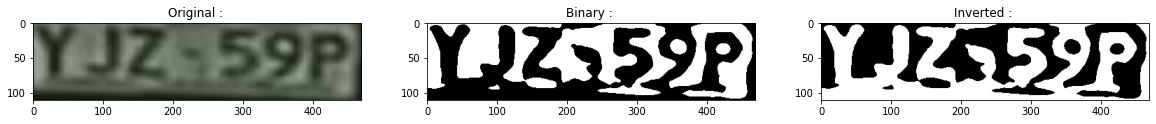

*************************************************************************
Original images : (110, 470, 3)


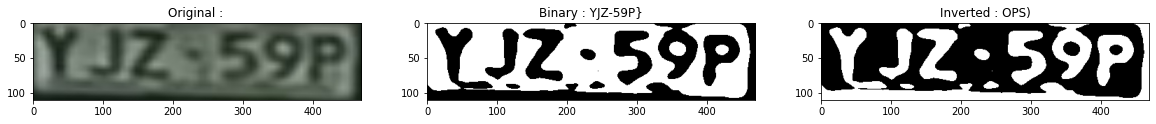

********************************
Enhanced images : (110, 470, 3)


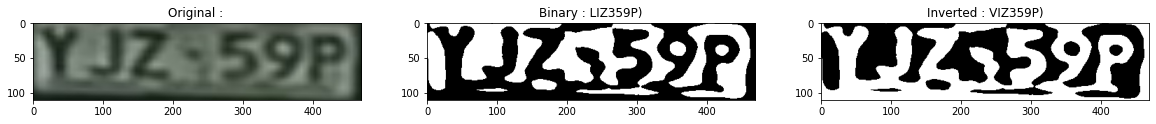

*************************************************************************
Original images : (110, 470, 3)


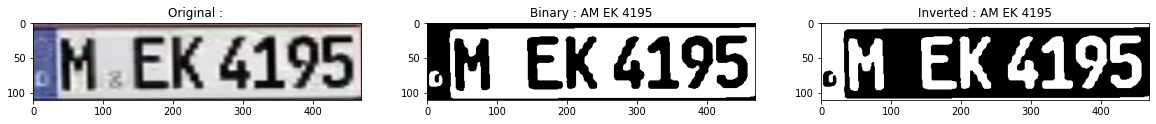

********************************
Enhanced images : (110, 470, 3)


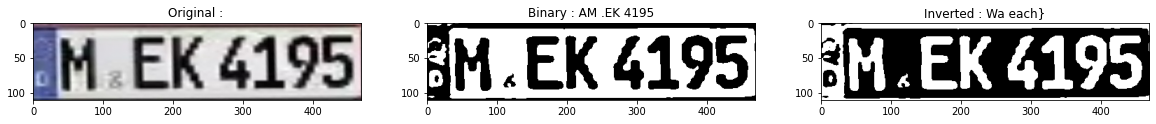

*************************************************************************


In [8]:
for img_cnt, bothimages in enumerate(zip(img_list, enhanced_img_list)):

    
    plate_image, gray, blur, binary, dilate = get_image_formats(bothimages[0])
    allimage_types = [plate_image, gray, blur, binary, dilate]
    allimage_titles = ['original', 'gray', 'blur', 'binary', 'dilated']
    print(f'Original images : {plate_image.shape}')  
    
    inverted_binary = binary.copy()
    inverted_binary[inverted_binary ==0] = 1
    inverted_binary[inverted_binary ==255] = 0
    inverted_binary[inverted_binary ==1] = 255

    plt.figure(figsize= (20,8))    
    plot_orig_binary_inverted(bothimages[0], binary, inverted_binary)
    
    #plot_allimages(allimage_types, allimage_titles, string_flag = True)
    
    print('********************************')
          
                                                                           
    plate_image, gray, blur, binary, dilate = get_image_formats(bothimages[1])
    allimage_types = [plate_image, gray, blur, binary, dilate]
    allimage_titles = ['original', 'gray', 'blur', 'binary', 'dilated']
    print(f'Enhanced images : {plate_image.shape}')         
    
    inverted_binary = binary.copy()
    inverted_binary[inverted_binary ==0] = 1
    inverted_binary[inverted_binary ==255] = 0
    inverted_binary[inverted_binary ==1] = 255
    
    plt.figure(figsize= (20,8))    
    plot_orig_binary_inverted(bothimages[0], binary, inverted_binary)
    #plot_allimages(allimage_types, allimage_titles, string_flag = True)
    
    
    print('*************************************************************************')

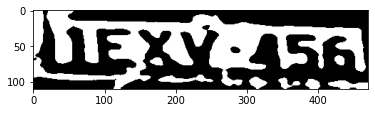

In [104]:
inverted_binary = binary.copy()
inverted_binary[inverted_binary ==0] = 1
inverted_binary[inverted_binary ==255] = 0
inverted_binary[inverted_binary ==1] = 255

plt.figure(num = 1)
plt.imshow(inverted_binary, cmap="gray")


In [105]:
print(binary)
print(inverted_binary)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


In [106]:
tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"

In [107]:
def quantize_low_high(img,low,high):
    newimg = img.copy()
    mid = (low+high)/2
    newimg[img<127] = low
    newimg[img>=127] = high
    return newimg

In [108]:
def swap_image_colors(img, low_color, high_color):
    swap_img = img.copy()
    swap_img[swap_img==low_color] = 1000
    swap_img[swap_img==high_color] = low_color
    swap_img[swap_img==1000] = high_color    
    return swap_img    

(110, 470)
Text to string output : binary_resized Image : aera
~—~ & 6 126 oe,
Text to string output : inverted_binary_resized Image : ULE XY -456)
—~ & © 136 wee


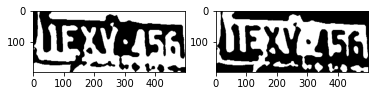

In [109]:
print(binary.shape)
binary_resized = cv2.resize(binary,(500,200))
binary_resized = quantize_low_high(binary_resized, 0 , 255)
inverted_binary_resized = swap_image_colors(binary_resized, 0, 255)

plt.figure(num = 1)
plt.subplot(121)
plt.imshow(binary_resized, cmap="gray")
plt.subplot(122)
plt.imshow(inverted_binary_resized, cmap="gray")


out = pytesseract.image_to_string(binary_resized, config=tess_config, lang="eng")
print(f'Text to string output : binary_resized Image : {out}')

out = pytesseract.image_to_string(inverted_binary_resized, config=tess_config, lang="eng")
print(f'Text to string output : inverted_binary_resized Image : {out}')

In [110]:
out = pytesseract.image_to_string(binary, config=tess_config, lang="eng")
print(f'Text to string output : Binary Image : {out}')
out = pytesseract.image_to_string(inverted_binary, config=tess_config, lang="eng")
print(f'Text to string output : Inverted Binary Image : {out}')

Text to string output : Binary Image : TRA TA
——* he @® 41-& <eae
Text to string output : Inverted Binary Image : ALE XY -456
i ik a. ee ae


In [111]:
print(binary_resized)
print(inverted_binary_resized)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[232 232 232 ...   0   0   0]
 [232 232 232 ...   0   0   0]
 [232 232 232 ...   0   0   0]
 ...
 [  0   0   0 ... 232 232 232]
 [  0   0   0 ... 232 232 232]
 [  0   0   0 ... 232 232 232]]


In [112]:
def sort_contours(cnts,reverse = False):
        i = 0
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                            key=lambda b: b[1][i], reverse=reverse))
        return cnts

In [113]:
def img_bg_detector_hor(input_img, high_color):    
    img = input_img.copy()
    img[img == high_color] = 1
    max_cnts_list = []
    for rr in range(img.shape[0]):       
        max_cnts = [0,0]
        cnts = [0,0]    
        
        prev = img[rr,0]
        
        for cc in range(1,img.shape[1]):
            pix = img[rr,cc]
            
            
            if (pix != prev):
                if (max_cnts[prev]<cnts[prev]):
                    max_cnts[prev] = cnts[prev]
                cnts[prev] = 0
            #print(f'cnts pix : {cnts, pix}')    
            cnts[pix]= cnts[pix]+1
            #print([prev, pix, cnts, max_cnts])
            prev = pix
        
        if (max_cnts[prev]<cnts[prev]):
            max_cnts[prev] = cnts[prev]   
        #print('End of line')
        #print([cnts, max_cnts])    
        max_cnts_list.append(max_cnts)
        
    return max_cnts_list

In [114]:
def img_bg_detector_ver(input_img, high_color):    
    img = input_img.copy()
    img[img == high_color] = 1

    max_cnts_list = []
    for cc in range(img.shape[1]):       
        max_cnts = [0,0]
        cnts = [0,0]    
        
        prev = img[0,cc]
        
        for rr in range(1,img.shape[0]):
            
            pix = img[rr,cc]
            
            if (pix != prev):
                if (max_cnts[prev]<cnts[prev]):
                    max_cnts[prev] = cnts[prev]
                cnts[prev] = 0
                
            cnts[pix]= cnts[pix]+1
            #print([rr,cc ,prev, pix, cnts, max_cnts])
            prev = pix
        
        if (max_cnts[prev]<cnts[prev]):
            max_cnts[prev] = cnts[prev]   
        #print('End of line')
        #print([cnts, max_cnts])    
        max_cnts_list.append(max_cnts)
        #print(max_cnts_list)
        
    return max_cnts_list

In [115]:
print(binary_resized)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [116]:
print(inverted_binary_resized)

[[232 232 232 ...   0   0   0]
 [232 232 232 ...   0   0   0]
 [232 232 232 ...   0   0   0]
 ...
 [  0   0   0 ... 232 232 232]
 [  0   0   0 ... 232 232 232]
 [  0   0   0 ... 232 232 232]]


[0, 14]


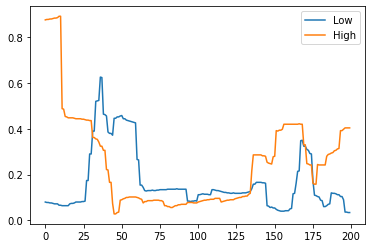

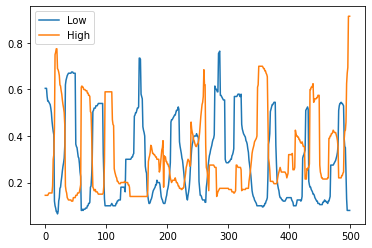

In [117]:
def count_above_thres(cnt_list, thres):
    cnt_array = []
    for x in cnt_list:
        if x>thres:
            cnt_array.append(1)
    return sum(cnt_array)

thres = 0.8
low_color = 0
high_color = 255

[h,w] = binary_resized.shape

max_list = img_bg_detector_hor(binary_resized, high_color)

cnt_low_list_hor = [xy[0]/w for xy in max_list]
cnt_high_list_hor = [xy[1]/w for xy in max_list]

plt.figure(1)
plt.plot(cnt_low_list_hor)
plt.plot(cnt_high_list_hor)
plt.legend(['Low','High'])

[h,w] = binary_resized.shape

max_list_ver = img_bg_detector_ver(binary_resized, high_color)

cnt_low_list_ver = [xy[0]/h for xy in max_list_ver]
cnt_high_list_ver = [xy[1]/h for xy in max_list_ver]

plt.figure(2)
plt.plot(cnt_low_list_ver)
plt.plot(cnt_high_list_ver)
plt.legend(['Low','High'])


low_cnt = count_above_thres(cnt_low_list_hor, thres) + count_above_thres(cnt_low_list_ver, thres)
high_cnt = count_above_thres(cnt_high_list_hor, thres) + count_above_thres(cnt_high_list_ver, thres)

print([low_cnt,high_cnt])

if (low_cnt > high_cnt):
    black_text_binary = swap_image_colors(binary_resized, low_color, high_color)
else:
    black_text_binary = binary_resized
    #bgcolor = high_color

In [118]:
#print(binary[0])

In [119]:
#

Text(0.5, 1.0, 'Black text binary')

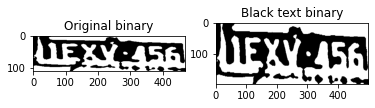

In [120]:
plt.figure(num=1)
plt.subplot(121)
plt.imshow(binary,cmap="gray")
plt.title('Original binary')
plt.subplot(122)
plt.imshow(black_text_binary,cmap="gray")
plt.title('Black text binary')

In [25]:
out = pytesseract.image_to_string(binary, config=tess_config, lang="eng")
print(f'Text to string output : Inverted Binary Image : {out}')
out = pytesseract.image_to_string(black_text_binary, config=tess_config, lang="eng")
print(f'Text to string output : Inverted Binary Image : {out}')

Text to string output : Inverted Binary Image : SON O91
Text to string output : Inverted Binary Image : SON O91


In [29]:
cont, _  = cv2.findContours(black_text_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
digit_w = 30
digit_h = 60

crop_characters = []
#print(cont[0])
for c in sort_contours(cont):
    #print('************************************')
                #print('Inside character recognition')
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    
    print([x,y,w,h])
    print(ratio)
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/binary.shape[0]>=0.5:

            curr_num = binary[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))

            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)
            plt.figure()
            plt.imshow(curr_num)



[0, 72, 2, 35]
17.5
[0, 0, 280, 200]
0.7142857142857143
[2, 129, 2, 19]
9.5
